In [32]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import os
from queryhandler.database_connector import DatabaseConnector

In [33]:
# connect to database in order to fetch top 200 coins data
db_connector = DatabaseConnector(
    db_name=os.environ.get("DATABASE_NAME"),
    db_user=os.environ.get("DATABASE_USER"),
    db_password=os.environ.get("DATABASE_PASSWORD"),
    db_host=os.environ.get("DATABASE_HOST"),
    db_port=os.environ.get("DATABASE_PORT"),
)
engine, connection = db_connector.connect_to_db()


Text(0.5, 1.0, 'Market-cap and Volume Relation')

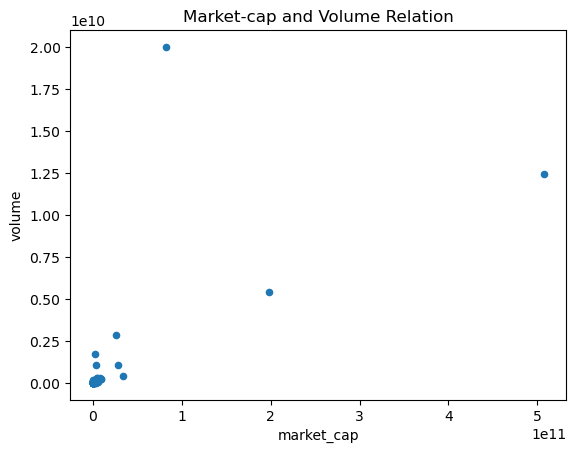

In [34]:
# define the query to fetch data from coin table
query = "SELECT * FROM coin_history where time_open='2023-08-25'"
df = pd.read_sql(query, engine)

# df['market_cap'] = [float(item) for item in df["market_cap"]]
# df['volume'] = [float(item) for item in df["volume"]]
# plot figure
ax = df.plot.scatter(x="market_cap", y="volume")
ax.set_title("Market-cap and Volume Relation")

In [35]:
# # define the query to fetch data from coin table
# coin_history_path = "/Users/User/Downloads/All_Data/all-365-days-csv"
# df_list = list()
# for file in os.listdir(coin_history_path):
#     try:
#         temp_df = pd.read_csv(os.path.join(coin_history_path, file), delimiter=";",parse_dates=['timestamp'])
#         df_list.append(temp_df)
#     except pd.errors.EmptyDataError:  # handle empty csv files
#         print(file)
#         
# df = pd.concat(df_list)
# 
# df['date'] = pd.to_datetime(df['timestamp']).dt.date
# df_aug = df.loc[df["date"] == pd.to_datetime("2023-08-25").date()]
# 
# ax = df_aug.plot.scatter(x="marketCap", y="volume")
# ax.set_title("Market-cap and Volume Relation")


In [36]:
# question 2

query = """SELECT c1.name AS coin1, c2.name AS coin2, COUNT(*) AS days
FROM coin AS c1
JOIN coin_history AS ch1 ON c1.id = ch1.coin
JOIN coin AS c2 ON c1.name < c2.name
JOIN coin_history AS ch2 ON c2.id = ch2.coin AND DATE(ch1.time_open) = DATE(ch2.time_open )
WHERE (ch1.close > ch1.open AND ch2.close > ch2.open) OR (ch1.close < ch1.open AND ch2.close < ch2.open)
GROUP BY c1.name, c2.name
ORDER BY days DESC, coin1 ASC, coin2 ASC
LIMIT 30;"""


# query = """SELECT 
#     c1.name AS coin_a,
#     c2.name AS coin_b,
#     count(*) as coin_rank   
# FROM
#     coin_history AS h1
# INNER JOIN
#     coin_history AS h2
# ON
#     h1.coin <> h2.coin
#     AND date(h1.timestamp) = date(h2.timestamp)
# INNER JOIN
#     coin c1 ON h1.coin = c1.id
#         INNER JOIN
#     coin c2 ON h2.coin = c2.id
# 
# WHERE
#     (h1.open - h1.close > 0 AND h2.open - h2.close > 0)
#     OR (h1.open - h1.close < 0 AND h2.open - h2.close < 0)
#     
# group by coin_a, coin_b
# order by coin_rank desc
# limit 30"""

df = pd.read_sql(query, engine)
df


,coin1,coin2,days
0,Bitcoin,Wrapped Bitcoin,351
1,PAX Gold,Pepe,347
2,Ethereum,Wrapped Bitcoin,309
3,Bitcoin,Ethereum,304
4,Bitcoin,yearn.finance,290
5,Wrapped Bitcoin,yearn.finance,289
6,Ethereum,yearn.finance,288
7,Bitcoin,BNB,273
8,BNB,Wrapped Bitcoin,273
9,BNB,yearn.finance,265


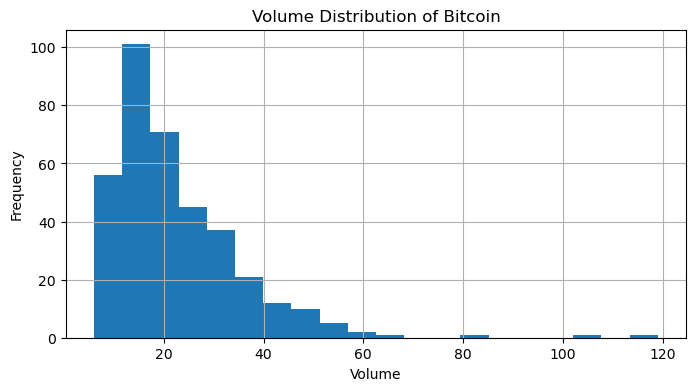

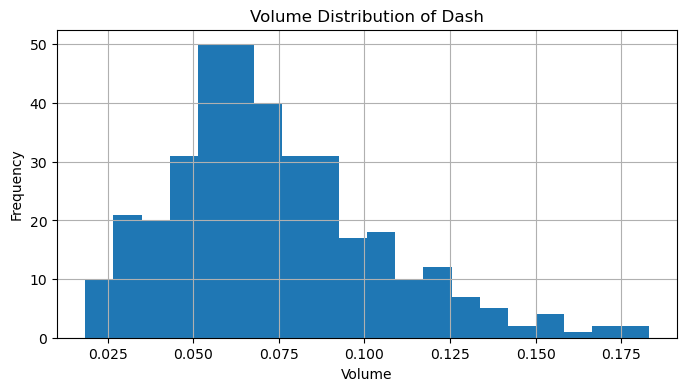

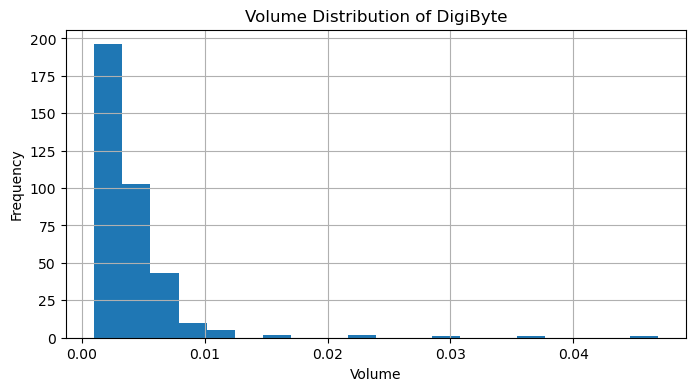

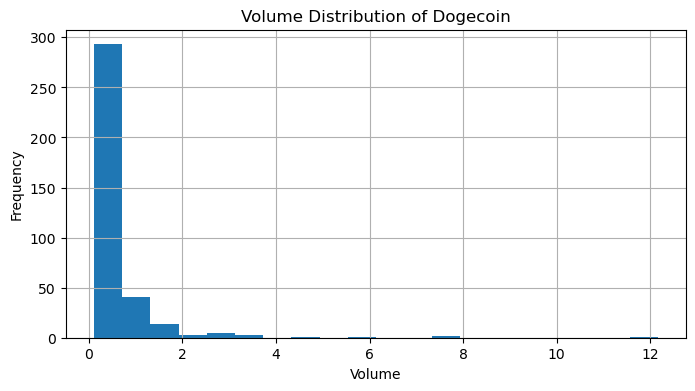

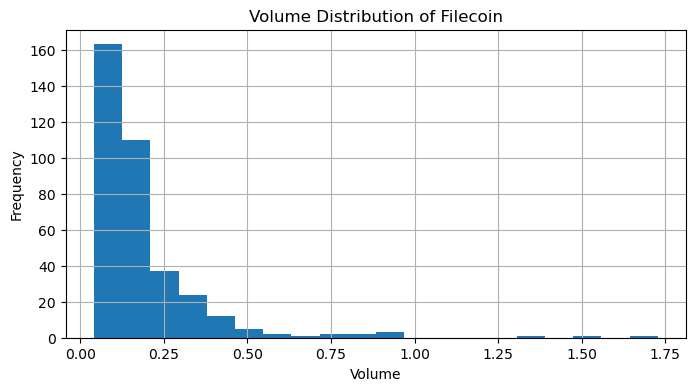

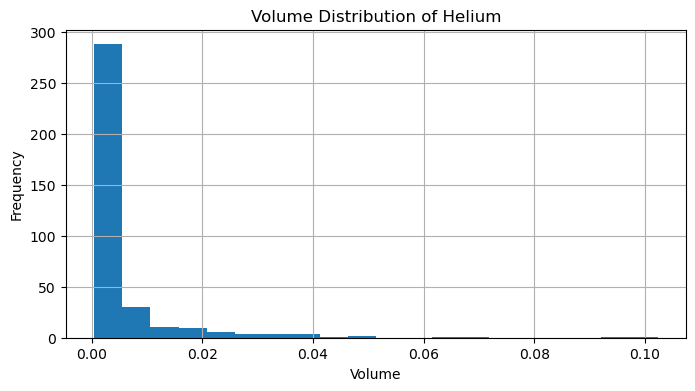

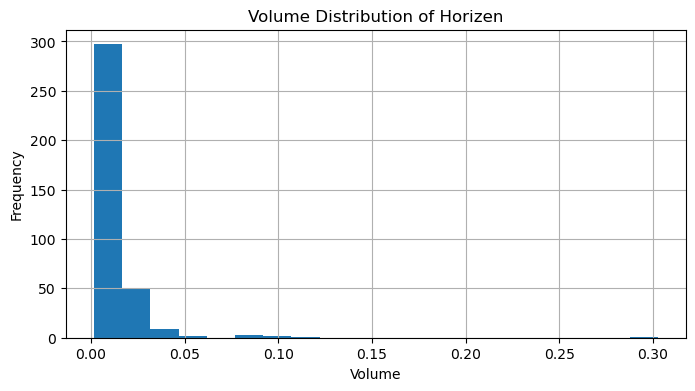

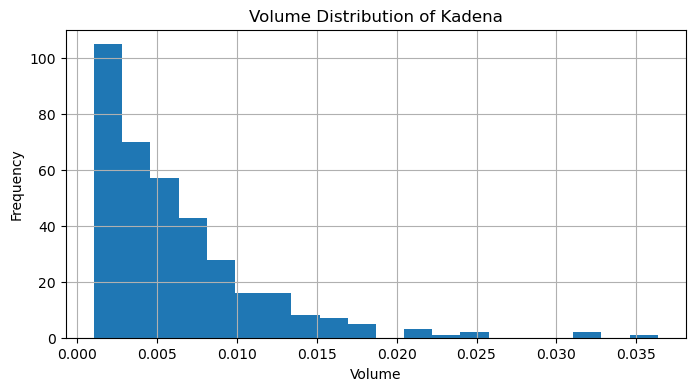

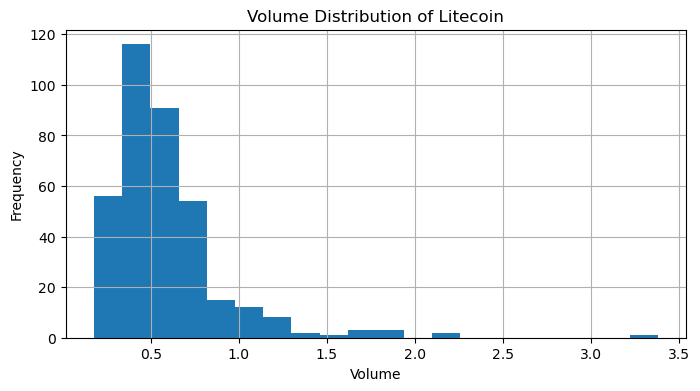

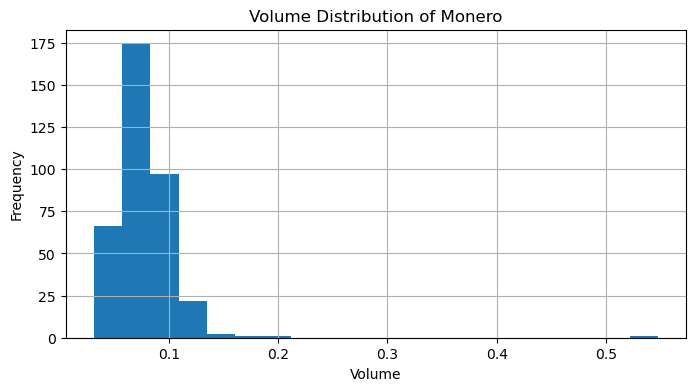

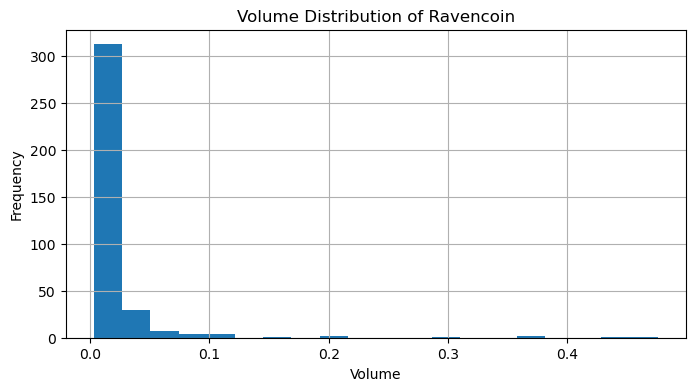

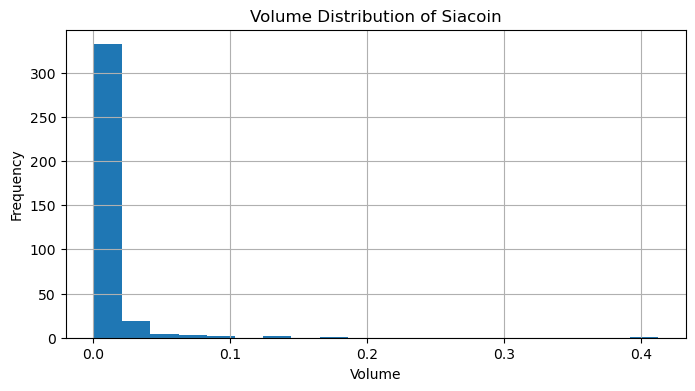

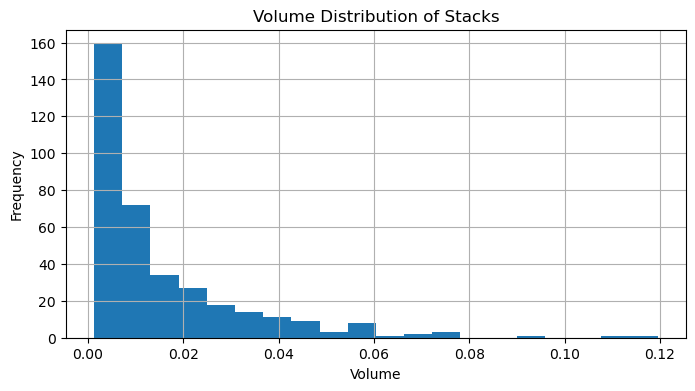

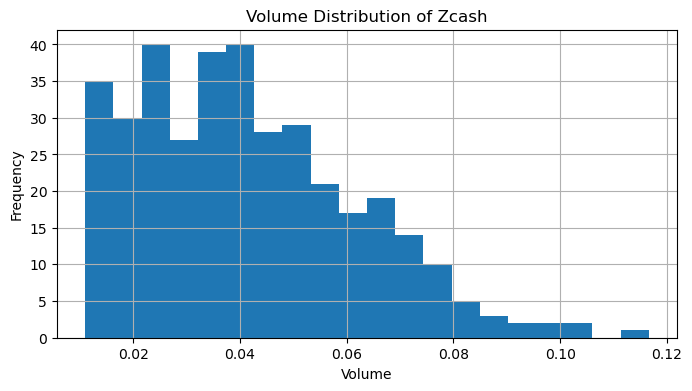

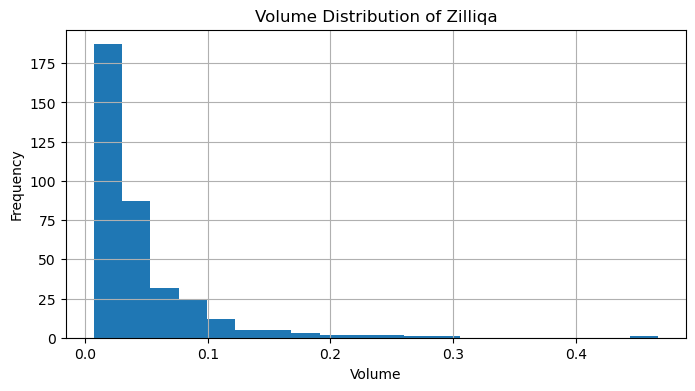

In [37]:
# question 3
import matplotlib.pyplot as plt
from queryhandler.models import Coin, CoinHistory

query = """Select coin.name,ch.volume 
FROM coin_history AS ch
JOIN coin on coin.id = ch.coin
JOIN coin_tag AS tg on coin.id = tg.coin
join tag on tag.id = tg.tag
where (tag.title = 'Mineable') 
;"""
df = pd.read_sql(query, engine)

# use the 'groupby' function to group the data by 'name'
grouped = df.groupby('name')

# Create a separate histogram for each coin
for name, group in grouped:
    plt.figure(figsize=(8, 4))  # Create a new figure for each coin
    volume_in_billions = group['volume'] / 1e9  # Convert volume to billions
    plt.hist(volume_in_billions, bins=20)
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.title(f'Volume Distribution of {name}')
    plt.grid(True)
    plt.show()